In [1]:
from core import*

ModuleNotFoundError: No module named 'core'

In [9]:
import qucat

In [3]:
#primo test con circuito lumped
circuit=QCircuit([C(0,1,90e-15),L(0,1,8e-9)]) # inizializzo semplice circuito LC 

In [2]:
f_starting_point=1
f_end_point=8
circuit.show_eigenvalues(f_starting_point, f_end_point) #provo a plottare gli autovalori (in questo caso solo la frequenza)

NameError: name 'circuit' is not defined

In [5]:
f=1/np.sqrt(90e-15*8e-9)/2/np.pi
print(f/1e9)
#sembra tornare

5.931354528476477


In [6]:
circuit.run_epr(f_starting_point, f_end_point) #runno epr dovrebbe darmi errore perché non ci sono giunzioni

ValueError: No junctions in the circuit

In [2]:
#secondo test con circuito lumped
circuit1=QCircuit([C(0,1,90e-15),J(0,1,8e-9)],4,7) # inizializzo semplice qubit 
circuit1.show_eigenvalues()

+------+------------+----------+
| Mode | Freq [GHz] | k [MHz]  |
+------+------------+----------+
|  1   |  5.93e+00  | 0.00e+00 |
+------+------------+----------+


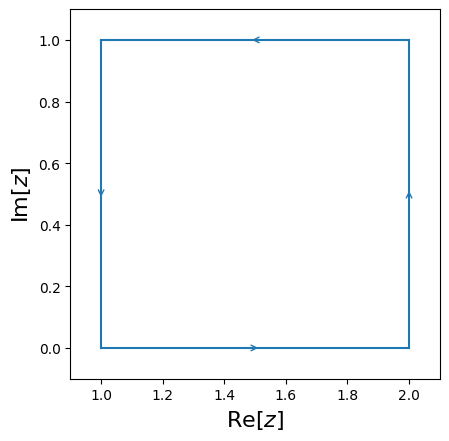

In [7]:
from cxroots import Rectangle
rect = Rectangle([1,2], [0,1])

rect.show()

In [4]:
f_starting_point=1
f_end_point=8
circuit1.show_eigenvalues(f_starting_point, f_end_point) #provo a plottare gli autovalori (in questo caso solo la frequenza)

+------+------------+----------+
| Mode | Freq [GHz] | k [MHz]  |
+------+------------+----------+
|  1   |  5.93e+00  | 0.00e+00 |
+------+------------+----------+


In [5]:
eigen=circuit1.eigenvectors(f_starting_point, f_end_point)
print(eigen)

[[0, 1]]


In [ ]:
circuit1.run_epr(f_starting_point, f_end_point) 

array([[215.22477192]])

In [8]:
print(e**2/2/90e-15/h/1e6)

215.224771918677


In [4]:
#secondo test con circuito lumped
circuit2=QCircuit([C(0,1,90e-15),J(0,1,8e-9),C(1,2,5e-15),C(0,2,60e-15),J(0,2,8e-9)],1,10) # inizializzo  qubit coupled to resonator 
circuit2.show_eigenvalues()

+------+------------+----------+
| Mode | Freq [GHz] | k [MHz]  |
+------+------------+----------+
|  1   |  7.02e+00  | 0.00e+00 |
|  2   |  5.75e+00  | 0.00e+00 |
+------+------------+----------+


In [3]:
f_starting_point=1
f_end_point=10
circuit2.show_eigenvalues() #provo a plottare gli autovalori (in questo caso solo la frequenza)

In [16]:
circuit2.eigenvalues(f_starting_point,f_end_point)

[np.float64(5.748659314237031), np.float64(7.023379680717606)]

In [17]:
print(1/np.sqrt(60e-15*8e-9)/2/np.pi/1e9)

7.26439603915684


In [18]:
circuit2.run_epr(f_starting_point,f_end_point)

array([[192.06190752,  24.70001448],
       [ 24.70001448, 286.68197538]])

In [10]:
circuit_components=[qucat.C(0,1,90e-15), #qubit capacitance
                        qucat.J(0,1,8e-9), #qubit inductance
                        qucat.C(0,2,60e-15), #resonator capacitance
                        qucat.L(0,2,8e-9),
                        qucat.C(1,2,5e-15), #coupling qubit-resonator
                        qucat.C(2,3,8e-15),
                        qucat.R(3,0,50)
                       ]
circuit=qucat.Network(circuit_components)
f=circuit.eigenfrequencies()
chi=circuit.kerr()
k=circuit.loss_rates()
a=circuit.anharmonicities()

circuit.f_k_A_chi(pretty_print =True)

         mode |       freq.  |       diss.  |       anha.  |
            0 |     5.74 GHz |      309 kHz |      184 MHz |
            1 |     6.64 GHz |     11.8 MHz |      541 kHz |

Kerr coefficients (diagonal = Kerr, off-diagonal = cross-Kerr)
         mode |         0    |         1    |
            0 |      184 MHz |              |
            1 |     19.9 MHz |      541 kHz |



(array([5.74052983e+09, 6.63536723e+09]),
 array([  308938.64578188, 11755004.40577816]),
 array([1.83937671e+08, 5.40826404e+05]),
 array([[1.83937671e+08, 1.99477667e+07],
        [1.99477667e+07, 5.40826404e+05]]))

In [5]:
#secondo test con circuito lumped
circuit2=QCircuit([C(0,1,90e-15),J(0,1,8e-9),C(1,2,5e-15),C(0,2,60e-15),L(0,2,8e-9),C(2,3,8e-15),R(3,0,50)],3,8) # inizializzo  qubit coupled to resonator 
circuit2.show_eigenvalues()

+------+------------+-----------+-----------+
| Mode | Freq [GHz] |  k [MHz]  |     Q     |
+------+------------+-----------+-----------+
|  1   |  6.64e+00  | -1.18e+01 | -5.64e+02 |
|  2   |  5.74e+00  | -3.09e-01 | -1.86e+04 |
+------+------------+-----------+-----------+


In [ ]:
k=circuit2.eigenvalues(f_starting_point,f_end_point)
print(2*k[1][1])

-0.3089386457818871


In [28]:
print(2*k[1][1])

-11.755004405781985


In [22]:
f_starting_point=1
f_end_point=10
circuit2.show_eigenvalues(f_starting_point, f_end_point) #provo a plottare gli autovalori (in questo caso solo la frequenza)

+------+------------+-----------+-----------+
| Mode | Freq [GHz] |  k [MHz]  |     Q     |
+------+------------+-----------+-----------+
|  1   |  5.74e+00  | -3.09e-01 | -1.86e+04 |
|  2   |  6.64e+00  | -1.18e+01 | -5.64e+02 |
+------+------------+-----------+-----------+


In [23]:
circuit2.run_epr(f_starting_point,f_end_point)

array([[183.93653142,  19.94701259],
       [ 19.94701259,   0.54078886]])

In [3]:
f_starting_point=1
f_end_point=10
circuit2.show_chi(f_starting_point,f_end_point)

Chi matrix [MHz]:
+------+----------+----------+
| Mode |    1     |    2     |
+------+----------+----------+
|  1   | 1.84e+02 | 1.99e+01 |
|  2   | 1.99e+01 | 5.41e-01 |
+------+----------+----------+


In [4]:
f_starting_point=1
f_end_point=10
circuit2.show_all(f_starting_point,f_end_point)

+------+------------+-----------+-----------+
| Mode | Freq [GHz] |  k [MHz]  |     Q     |
+------+------------+-----------+-----------+
|  1   |  5.74e+00  | -3.09e-01 | -1.86e+04 |
|  2   |  6.64e+00  | -1.18e+01 | -5.64e+02 |
+------+------------+-----------+-----------+
Chi matrix [MHz]:
+------+----------+----------+
| Mode |    1     |    2     |
+------+----------+----------+
|  1   | 1.84e+02 | 1.99e+01 |
|  2   | 1.99e+01 | 5.41e-01 |
+------+----------+----------+


In [5]:
#secondo test con circuito lumped
circuit3=QCircuit([C(0,1,98.19e-15),J(0,1,11e-9),C(1,2,4.4e-15),CPW(0,2,5.76e-3),C(2,3,8.62e-15),R(0,3,50)]) #qubit coupled to lambda quarter resonator

In [ ]:
f_starting_point=1
f_end_point=10
circuit3.eigenva(f_starting_point,f_end_point)

[array([0.00000000e+00+0.j        , 2.92426385e-01-0.j        ,
        9.56195490e-01+0.00140457j, 1.62023658e-04+0.0132286j ])]

In [6]:
circuit3.show_all(f_starting_point,f_end_point)

+------+------------+-----------+-----------+
| Mode | Freq [GHz] |  k [MHz]  |     Q     |
+------+------------+-----------+-----------+
|  1   |  5.11e+00  | -1.22e+00 | -4.17e+03 |
+------+------------+-----------+-----------+
Chi matrix [MHz]:
+------+----------+
| Mode |    1     |
+------+----------+
|  1   | 6.03e-02 |
+------+----------+


In [2]:
Cp0=96e-15
Cp1=89.2e-15
C12=47.85e-15
Lj=16.3e-9
Cg=14e-15
l=5.59e-3
l1=0.2e-3

circuit_test=QCircuit([C(0,1,Cp0),C(0,2,Cp1),C(1,2,C12),C(2,3,Cg),L(1,2,Lj),CPW(3,4,l-l1),CPW_coupler([4,0,5,6],[10,10,10],[15,15],l1),R(0,5,50),R(0,6,50)],2,6)

In [9]:
Cp0=96e-15
Cp1=89.2e-15
C12=47.85e-15
Lj=16.3e-9
Cg=14e-15
l=5.59e-3
l1=0.2e-3

circuit_test=QCircuit([C(0,1,Cp0),C(0,2,Cp1),C(1,2,C12),C(2,3,Cg),L(1,2,Lj),CPW(3,0,l)],3,8)

In [3]:
circuit_test.show_eigenvalues()

+------+------------+-----------+-----------+
| Mode | Freq [GHz] |  k [MHz]  |     Q     |
+------+------------+-----------+-----------+
|  1   |  3.99e+00  | -2.66e-03 | -1.50e+06 |
|  2   |  5.22e+00  | -1.71e+00 | -3.06e+03 |
+------+------------+-----------+-----------+


In [5]:
Cj=77.5e-15
Lj=7.73e-9
Cg=20e-15
l=3.97e-3
l1=0.4e-3

circuit_structure4=QCircuit([C(0,1,Cj),J(0,1,Lj),C(1,2,Cg),CPW(2,3,l-l1),CPW_coupler([3,0,4,5],[10,5,15,10],[15,2,15],l1),R(0,5,50),R(0,4,50)],5,9)

In [6]:
circuit_structure4.show_all()

+------+------------+-----------+-----------+
| Mode | Freq [GHz] |  k [MHz]  |     Q     |
+------+------------+-----------+-----------+
|  1   |  5.74e+00  | -5.79e-02 | -9.90e+04 |
|  2   |  7.41e+00  | -2.36e+00 | -3.13e+03 |
+------+------------+-----------+-----------+
Chi matrix [MHz]:
+------+----------+----------+
| Mode |    1     |    2     |
+------+----------+----------+
|  1   | 1.79e+02 | 2.79e+01 |
|  2   | 2.79e+01 | 1.09e+00 |
+------+----------+----------+


In [10]:
L1=10e-9
C1=70e-15
C2=8e-15
Resistance=50
circuit1=QCircuit([C(0,1,C1),L(0,1,L1),C(1,2,C2),R(2,0,50)],3,6)
circuit1.show_eigenvalues()

+------+------------+-----------+-----------+
| Mode | Freq [GHz] |  k [MHz]  |     Q     |
+------+------------+-----------+-----------+
|  1   |  5.70e+00  | -8.37e+00 | -6.81e+02 |
+------+------------+-----------+-----------+
